<a href="https://colab.research.google.com/github/maglili/MNIST/blob/main/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Note]**
執行時請先將執行階段改成 GPU 加速運算。

<small>更改方式: 執行階段> 變更執行階段類型> 硬體加速器選擇GPU> 儲存</small>

**Pytorch document:**

Layers:
- [conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- [MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d)
- [Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten)
- [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)
- [BatchNorm2d (optional)](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html#torch.nn.BatchNorm2d)
- [Dropout (optional)](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)


Activation function:
- [Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid)
- [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)
- [Tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh)

# Convolution / pooling in pytorch

## Convolution

### 卷積實際例子
不必細看程式碼，只要關注在輸出結果就好。

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


原始圖片:


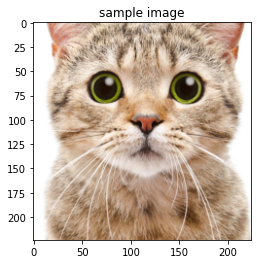

In [ ]:
#載入圖片以及Resnet18

#====================================================================================================
import torch
torch.manual_seed(0)
model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True) #載入resnet
model.eval();

# Download an example image from the pytorch website
import urllib
url, filename = ("https://wallpaperaccess.com/full/2773879.jpg", "cat.jpg") #下載圖片
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

# sample execution (requires torchvision)
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print('原始圖片:')
plt.imshow(input_tensor.permute(1,2,0).cpu().detach().numpy())
plt.title('sample image')
plt.show()


[印出前20個kernel的圖片]:



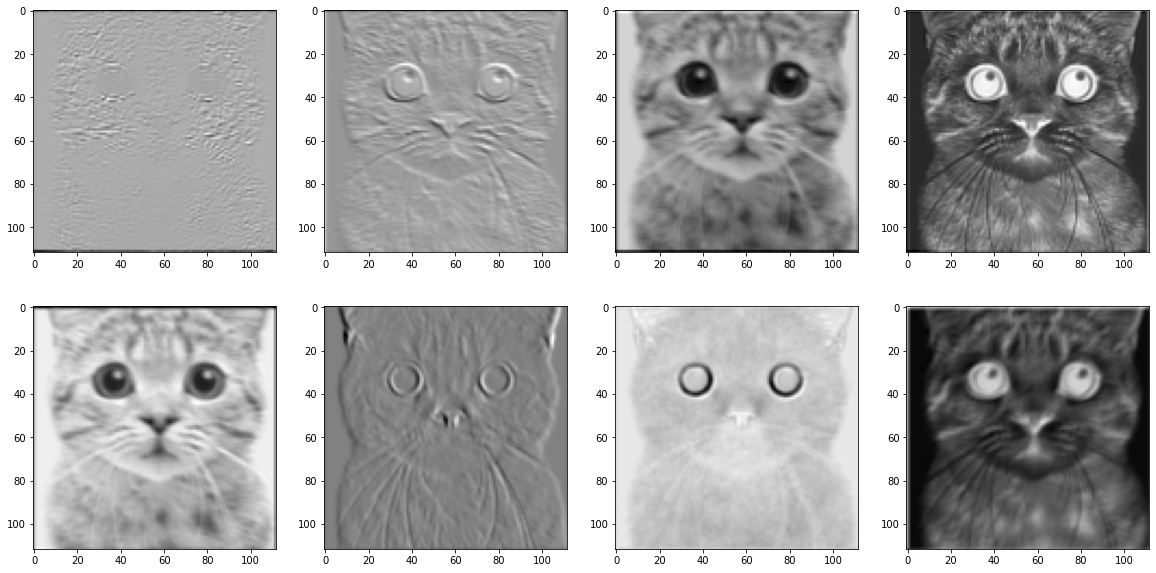

In [ ]:
#顯示卷積後的結果

#====================================================================================================
conv_layer = model.conv1 # 從resnet 的 conv1 提取kernel，共有64個kernel

conv_images = conv_layer(input_batch) # 把圖片丟入 conv_layer 中，得出卷積結果
print('\n[印出前20個kernel的圖片]:\n')

import matplotlib.pylab as plt # plot module
import numpy as np
fig=plt.figure(figsize=(20, 10))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    img = conv_images[0][i-1].cpu().detach().numpy()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

### 實作

創造卷積層

In [ ]:
import torch
import torch.nn as nn

input = torch.rand(1,1,3,3) # 輸入矩陣 [batch,channel,w,h]
print('輸入:\n',input)
print()

conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2) # 實體化卷積層
print('kernel and bias:\n',conv_layer.state_dict())

輸入:
 tensor([[[[0.9902, 0.2192, 0.5632],
          [0.7077, 0.9335, 0.6176],
          [0.0199, 0.5353, 0.6405]]]])

kernel and bias:
 OrderedDict([('weight', tensor([[[[-0.0293, -0.4482],
          [ 0.0891,  0.4169]]]])), ('bias', tensor([-0.3670]))])


輸出結果

In [ ]:
output = conv_layer(input)
output

tensor([[[[-0.0419, -0.2851],
          [-0.5812, -0.3564]]]], grad_fn=<ThnnConv2DBackward>)

## Pooling

宣告一個矩陣，代表圖片

In [ ]:
image1=torch.zeros(1,1,4,4)
image1[0,0,0,:]=torch.tensor([1.0,2.0,3.0,-4.0])
image1[0,0,1,:]=torch.tensor([0.0,2.0,-3.0,0.0])
image1[0,0,2,:]=torch.tensor([0.0,2.0,3.0,1.0])

image1

tensor([[[[ 1.,  2.,  3., -4.],
          [ 0.,  2., -3.,  0.],
          [ 0.,  2.,  3.,  1.],
          [ 0.,  0.,  0.,  0.]]]])

輸出結果

In [ ]:
max1=torch.nn.MaxPool2d(2) # 實體化池化層
max1(image1)

tensor([[[[2., 3.],
          [2., 3.]]]])

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3_max_pool_animation_2.gif" width = 500, align = "center">


## Flatten

宣告輸入

In [ ]:
image = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]]])
image

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

輸出結果(矩陣被攤平)

In [ ]:
m = nn.Flatten() # 實體化Flatten層
m(image)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

## Full connect layer

In [ ]:
input = torch.tensor([[1,2,3,4,5]]).float()
print('input:',input)

fc = nn.Linear(5,1) # 實體化全連接層

input: tensor([[1., 2., 3., 4., 5.]])


輸出結果

In [ ]:
output = fc(input)
output

tensor([[-1.8306]], grad_fn=<AddmmBackward>)

## Activation layer

In [ ]:
input = torch.tensor([[-5,-1,0,3,8]]).float()
print('Input:',input)
print('-'*50)
#====================================================
relu = nn.ReLU() # 實體化ReLU層
out1 = relu(input)
print('ReLU:', out1)

tanh = nn.Tanh() # 實體化Tanh層
out2 = tanh(input)
print('Tanh:', out2)

sigmoid = nn.Sigmoid() # 實體化sigmoid層
out3 = sigmoid(input)
print('Sigmoid:', out3)
#====================================================
print('-'*50)
softmax = nn.Softmax(dim=1)  # 實體化Softmax層
out4 = softmax(input)
print('Softmax:', out4)

Input: tensor([[-5., -1.,  0.,  3.,  8.]])
--------------------------------------------------
ReLU: tensor([[0., 0., 0., 3., 8.]])
Tanh: tensor([[-0.9999, -0.7616,  0.0000,  0.9951,  1.0000]])
Sigmoid: tensor([[0.0067, 0.2689, 0.5000, 0.9526, 0.9997]])
--------------------------------------------------
Softmax: tensor([[2.2442e-06, 1.2253e-04, 3.3306e-04, 6.6898e-03, 9.9285e-01]])


# LeNet-5

**LeNet-5 架構:**
<hr>
<img src="https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg"/>

## 資料準備與前處理

引入所需 module

In [ ]:
import torch  # pytorch
torch.manual_seed(0) # keep random seed
import torch.nn as nn
import torchvision.transforms as transforms # image processing module
import torchvision.datasets as dsets # dataset
import matplotlib.pylab as plt # plot module
import numpy as np # matrix module
from tqdm.notebook import tqdm # 顯示進度條

定義用來檢視資料的function

In [ ]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

將多個前處理結合在變數 composed 中
1. resize()，將大小28x28的圖片轉成32*32
2. ToTensor()，把圖片轉成tensor(張量)才可以丟入model

In [ ]:
IMAGE_SIZE = 32 # Original size: 28

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)) ,transforms.ToTensor(),])

下載MNIST資料並將資料前處理

MNIST共包含了:
- 6萬張的Training data
- 1萬張的Testing data

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" alt="MNIST samples" width="40%"><br>


參考資料:<a href='https://en.wikipedia.org/wiki/MNIST_database'>WIKI-MNIST</a>

In [ ]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed);
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed);
print('Length of train_dataset:', len(train_dataset))
print('Length of validation_dataset:', len(validation_dataset))

Length of train_dataset: 60000
Length of validation_dataset: 10000


檢視MNIST圖片

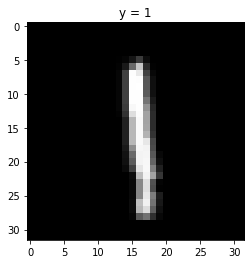

In [ ]:
num = 8 #<--- Any number you want 
show_data(train_dataset[num])

## Defining model

選擇GPU進行訓練

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU is avalible.')
  print('Working on:', torch.cuda.get_device_name())
else:
  device = torch.device('cpu')
  print('GPU is not avalible.')
  print('Working on CPU')

GPU is avalible.
Working on: Tesla P4


**[Try yourself]**定義 model (堆積木)

In [ ]:
model2 = nn.Sequential(
        #===============START====================
        nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5),


        
        #===================END==================

        )

model2.to(device) # moving to GPU

檢視模型資訊

In [ ]:
from torchsummary import summary
summary(model2, (1, 32, 32))

定義超參數(hyper paeameters):
- loss function
- learning rate
- optimizer
- batch size

DataLoader 用來將資料丟入model，batch_size用來決定一次丟入多少個data進model



In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1024)

定義訓練函式

In [ ]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
  N_test=len(validation_dataset)
  N_train=len(train_dataset)
  train_acc=[] 
  cv_acc=[]   
  train_loss=[] 
  cv_loss=[]   

  for epoch in tqdm(range(n_epochs)):
    #training=============================================
    training_loss = []
    correct = 0
    model.train() # switch model to train mode
    for x, y in train_loader:
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      z = model(x)
      _, yhat = torch.max(z.data, 1)
      correct += (yhat == y).sum().item()
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      training_loss.append(loss.item()) 
    train_loss.append(np.mean(training_loss))
    train_acc.append(correct / N_train)

    #validation===========================================
    training_loss = []
    correct = 0
    model.eval() # switch model to train mode
    with torch.no_grad(): 
      for x_test, y_test in validation_loader:
        x_test, y_test= x_test.to(device), y_test.to(device)
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        loss = criterion(z, y_test)
        training_loss.append(loss.item())
      cv_loss.append(np.mean(training_loss))
      cv_acc.append(correct / N_test)
     
  return  train_acc, cv_acc, train_loss, cv_loss

In [ ]:
train_acc, cv_acc, train_loss, cv_loss = train_model(model=model2,n_epochs=4,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

Learning curve

In [ ]:
plt.plot(train_acc,label='train_acc')
plt.plot(cv_acc ,label='cv_acc')
plt.title('train / valid  accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
#axes = plt.gca()
#axes.set_ylim([0.4, 1])
plt.legend()
plt.grid()
plt.show()

plt.plot(train_loss,label='train_cost')
plt.plot(cv_loss,label='cv_acc')
plt.title('train / valid  loss')
plt.xlabel('epochs')
plt.ylabel('loss')
#axes = plt.gca()
#axes.set_ylim([0, 1])
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('[Training] ACC:',train_acc[-1])
print('[Training] LOSS:',train_loss[-1])
print('-'*10)
print('[Test] ACC:',cv_acc[-1])
print('[Test] LOSS:',cv_loss[-1])

## **[Try yourself]** 建立自己的CNN模型

試著自己拚出一個 model，須注意每一層的輸出維度!<br>

公式: New_image_size = (image_size - kernel_size)/stride + 1

嘗試使用:
- nn.Conv2d
- nn.AvgPool2d / nn.MaxPool2d
- nn.Batchnorm
- nn.ReLU / nn.Tanh() / nn.sigmoid()
- nn.Linear
- nn.Flatten()

更多資訊請看官方說明 <a href="https://pytorch.org/docs/stable/nn.html">torch.nn</a>

**[Try yourself]**定義模型

In [ ]:
my_model = nn.Sequential(
    
        # modify yourself
        # image size: 32 * 32

        # e.g 
        #   nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5),
        #   nn.MaxPool2d(kernel_size=2),
        #   nn.Flatten(),
        #   nn.Linear(1176,10)
        #============================START================================
        nn.Conv2d(#modify here),
        nn.MaxPool2d(#modify here),

        #==============================END==============================
        )

my_model.to(device)

In [ ]:
from torchsummary import summary
summary(my_model, (1, 32, 32))

**[Try yourself]** 定義超參數

可以嘗試更換:
- learning_rate
- optimizer
- train_loader's batch_size

<a href="https://pytorch.org/docs/stable/optim.html">pytorch官方: optimizer</a>

In [ ]:
# modify yourself

# e.g 
# learning_rate = 0.0005
# optimizer = torch.optim.Adam(my_model.parameters(), lr=learning_rate)
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64)
# validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1024)

#============================START================================
learning_rate = #modify here
optimizer = #modify here
train_loader torch.utils.data.DataLoader(dataset=train_dataset, batch_size= #modify here )
#==============================END==============================

criterion = nn.CrossEntropyLoss()
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1024)

In [ ]:
train_acc, cv_acc, train_loss, cv_loss = train_model(model=my_model,n_epochs=4,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

### Learning curve

In [ ]:
plt.plot(train_acc,label='train_acc')
plt.plot(cv_acc ,label='cv_acc')
plt.title('train / valid  accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
#axes = plt.gca()
#axes.set_ylim([0.4, 1])
plt.legend()
plt.grid()
plt.show()

plt.plot(train_loss,label='train_cost')
plt.plot(cv_loss,label='cv_acc')
plt.title('train / valid  loss')
plt.xlabel('epochs')
plt.ylabel('loss')
#axes = plt.gca()
#axes.set_ylim([0, 1])
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('[Training] ACC:',train_acc[-1])
print('[Training] LOSS:',train_loss[-1])
print('-'*10)
print('[Test] ACC:',cv_acc[-1])
print('[Test] LOSS:',cv_loss[-1])

# AlexNet(optional)

<img src="https://paperswithcode.com/media/methods/Screen_Shot_2020-06-22_at_6.35.45_PM.png" width="80%">

參考資料:
- [Pytorch|AlexNet](https://pytorch.org/hub/pytorch_vision_alexnet/)
- [原始論文](http://www.cs.toronto.edu/~hinton/absps/imagenet.pdf)



此部分在預處理時，有將先MNIST轉成RGB channel，並且對圖片做正規化處理。

e.g. transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

## 資料準備與前處理

引入所需 module

In [ ]:
import torch  # pytorch
torch.manual_seed(0) # keep random seed
import torch.nn as nn
import torchvision.transforms as transforms # image processing module
import torchvision.datasets as dsets # dataset
import matplotlib.pylab as plt # plot module
import numpy as np # matrix module
from tqdm.notebook import tqdm # 顯示進度條

定義用來檢視資料的function

In [ ]:
def show_data(data_sample):
    image = data_sample[0].numpy().reshape(3, IMAGE_SIZE, IMAGE_SIZE)
    image = np.transpose(image, axes=[1, 2, 0])
    plt.imshow(image)
    plt.title('y = '+ str(data_sample[1]))

In [ ]:
IMAGE_SIZE = 224 # Original size: 28

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                          transforms.ToTensor(),
                          transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

下載<a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST</a>資料並將資料前處理，資料如下所示:<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" alt="MNIST samples"><br>
MNIST共包含了:
- 6萬張的Training data
- 1萬張的Testing data

In [ ]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

In [ ]:
print('Length of train_dataset:', len(train_dataset))
print('Length of validation_dataset:', len(validation_dataset))

Length of train_dataset: 60000
Length of validation_dataset: 10000


檢視MNIST圖片

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


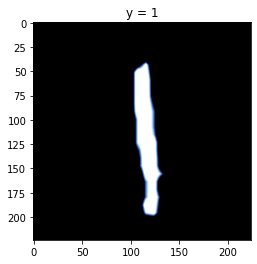

In [ ]:
num = 8 #<--- Any number you want 
show_data(train_dataset[num])

## Defining model

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU is avalible.')
  print('Working on:', torch.cuda.get_device_name())
else:
  device = torch.device('cpu')
  print('GPU is not avalible.')
  print('Working on CPU')

GPU is avalible.
Working on: Tesla T4


定義model (堆積木)

In [ ]:
# Method2
class AlexNet(nn.Module):
    # Contructor
    def __init__(self,out):
        super(AlexNet, self).__init__()
        self.out = out
        self.feature = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
        )
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(6, 6))
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=9216, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=4096, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=4096, out_features=self.out, bias=True)
        )
    # Prediction
    def forward(self, x):
        x = self.feature(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

model = AlexNet(10)

model.to(device) # moving to GPU

AlexNet(
  (feature): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_f

相似於keras的summary功能

In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
!nvidia-smi

Sun Dec 20 04:24:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    32W /  70W |   2729MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

定義超參數(hyper paeameters)

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=256)

In [ ]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
  N_test=len(validation_dataset)
  N_train=len(train_dataset)
  train_acc=[] 
  cv_acc=[]   
  train_loss=[] 
  cv_loss=[]   

  for epoch in tqdm(range(n_epochs)):
    #training=============================================
    training_loss = []
    correct = 0
    model.train() # switch model to train mode
    for x, y in train_loader:
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      z = model(x)
      _, yhat = torch.max(z.data, 1)
      correct += (yhat == y).sum().item()
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      training_loss.append(loss.item()) 
    train_loss.append(np.mean(training_loss))
    train_acc.append(correct / N_train)

    #validation===========================================
    training_loss = []
    correct = 0
    model.eval() # switch model to train mode
    with torch.no_grad(): 
      for x_test, y_test in validation_loader:
        x_test, y_test= x_test.to(device), y_test.to(device)
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        loss = criterion(z, y_test)
        training_loss.append(loss.item())
      cv_loss.append(np.mean(training_loss))
      cv_acc.append(correct / N_test)
     
  return  train_acc, cv_acc, train_loss, cv_loss

In [ ]:
train_acc, cv_acc, train_loss, cv_loss = train_model(model=model,n_epochs=4,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

## Learning curve

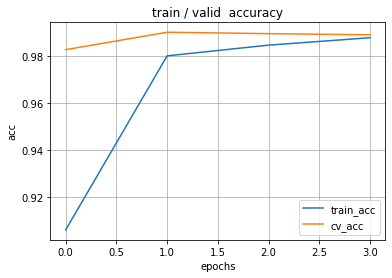

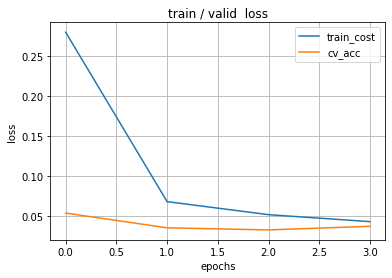

In [ ]:
plt.plot(train_acc,label='train_acc')
plt.plot(cv_acc ,label='cv_acc')
plt.title('train / valid  accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
#axes = plt.gca()
#axes.set_ylim([0.4, 1])
plt.legend()
plt.grid()
plt.show()

plt.plot(train_loss,label='train_cost')
plt.plot(cv_loss,label='cv_acc')
plt.title('train / valid  loss')
plt.xlabel('epochs')
plt.ylabel('loss')
#axes = plt.gca()
#axes.set_ylim([0, 1])
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('[Training] ACC:',train_acc[-1])
print('[Training] LOSS:',train_loss[-1])
print('-'*10)
print('[Test] ACC:',cv_acc[-1])
print('[Test] LOSS:',cv_loss[-1])

[Training] ACC: 0.9878666666666667
[Training] LOSS: 0.042508939098291745
----------
[Test] ACC: 0.9891
[Test] LOSS: 0.0366559866371972


# VGG16(homework)

下圖中，D欄位為VGG16的架構:

<img src="https://neurohive.io/wp-content/uploads/2018/11/Capture-564x570.jpg" width="50%" >

圖形化的架構:

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width="80%" >

參考資料:
- [Pytorch|vgg-nets](https://pytorch.org/hub/pytorch_vision_vgg/)
- [原始論文](https://arxiv.org/abs/1409.1556)


此部分在預處理時，有將先MNIST轉成RGB channel，並且對圖片做正規化處理。

e.g. transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


**[注意]** 訓練VGG-16需要花費一定時間，一個 epoch 約為 25 分鐘(batch_size=128)

## 資料準備與前處理

引入所需 module

In [1]:
import torch  # pytorch
torch.manual_seed(0) # keep random seed
import torch.nn as nn
import torchvision.transforms as transforms # image processing module
import torchvision.datasets as dsets # dataset
import matplotlib.pylab as plt # plot module
import numpy as np # matrix module
from tqdm.notebook import tqdm # 顯示進度條

定義用來檢視資料的function

In [2]:
def show_data(data_sample):
    image = data_sample[0].numpy().reshape(3, IMAGE_SIZE, IMAGE_SIZE)
    image = np.transpose(image, axes=[1, 2, 0])
    plt.imshow(image)
    plt.title('y = '+ str(data_sample[1]))

In [3]:
IMAGE_SIZE = 224 # Original size: 28

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                          transforms.ToTensor(),
                          transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

下載<a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST</a>資料並將資料前處理，資料如下所示:<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" alt="MNIST samples"><br>
MNIST共包含了:
- 6萬張的Training data
- 1萬張的Testing data

In [4]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
print('Length of train_dataset:', len(train_dataset))
print('Length of validation_dataset:', len(validation_dataset))

Length of train_dataset: 60000
Length of validation_dataset: 10000


檢視MNIST圖片

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


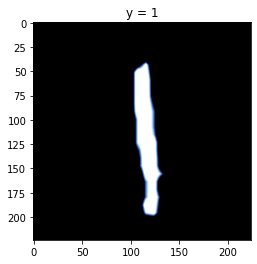

In [6]:
num = 8 #<--- Any number you want 
show_data(train_dataset[num])

## Defining model

In [7]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU is avalible.')
  print('Working on:', torch.cuda.get_device_name())
else:
  device = torch.device('cpu')
  print('GPU is not avalible.')
  print('Working on CPU')

GPU is avalible.
Working on: Tesla T4


**[Try yourself]**定義model (堆積木)

In [ ]:
# Method2
class VGG16(nn.Module):
    # Contructor
    def __init__(self):
        super(VGG16, self).__init__()

        self.feature = nn.Sequential(
            #=======================START=====================
            nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            #try yourself


            #========================END======================
            )

        
    # Prediction
    def forward(self, x):
        x = self.feature(x)
        return x

model = VGG16()

model.to(device) # moving to GPU

相似於keras的summary功能

In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224))

定義超參數(hyper paeameters)

In [14]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=256)

In [15]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
  N_test=len(validation_dataset)
  N_train=len(train_dataset)
  train_acc=[] 
  cv_acc=[]   
  train_loss=[] 
  cv_loss=[]   

  for epoch in tqdm(range(n_epochs)):
    #training=============================================
    training_loss = []
    correct = 0
    model.train() # switch model to train mode
    for x, y in train_loader:
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      z = model(x)
      _, yhat = torch.max(z.data, 1)
      correct += (yhat == y).sum().item()
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      training_loss.append(loss.item()) 
    train_loss.append(np.mean(training_loss))
    train_acc.append(correct / N_train)

    #validation===========================================
    training_loss = []
    correct = 0
    model.eval() # switch model to train mode
    with torch.no_grad(): 
      for x_test, y_test in validation_loader:
        x_test, y_test= x_test.to(device), y_test.to(device)
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        loss = criterion(z, y_test)
        training_loss.append(loss.item())
      cv_loss.append(np.mean(training_loss))
      cv_acc.append(correct / N_test)
     
  return  train_acc, cv_acc, train_loss, cv_loss

[注意] 訓練VGG-16需要花費一定時間，一個 epoch 約為 25 分鐘(batch_size=128)

In [ ]:
train_acc, cv_acc, train_loss, cv_loss = train_model(model=model,n_epochs=4,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

## Learning curve

In [ ]:
plt.plot(train_acc,label='train_acc')
plt.plot(cv_acc ,label='cv_acc')
plt.title('train / valid  accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
#axes = plt.gca()
#axes.set_ylim([0.4, 1])
plt.legend()
plt.grid()
plt.show()

plt.plot(train_loss,label='train_cost')
plt.plot(cv_loss,label='cv_acc')
plt.title('train / valid  loss')
plt.xlabel('epochs')
plt.ylabel('loss')
#axes = plt.gca()
#axes.set_ylim([0, 1])
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('[Training] ACC:',train_acc[-1])
print('[Training] LOSS:',train_loss[-1])
print('-'*10)
print('[Test] ACC:',cv_acc[-1])
print('[Test] LOSS:',cv_loss[-1])

# 參考答案

## LeNet-5

In [ ]:
# Method 2: Easier way

model2 = nn.Sequential(
          nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5),
          nn.AvgPool2d(kernel_size=2),
          nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5),
          nn.AvgPool2d(kernel_size=2),
          nn.Flatten(),

          nn.Linear(5*5*16,120),
          nn.Tanh(),

          nn.Linear(120,84),
          nn.Tanh(),

          nn.Linear(84,10),
        )


'''
# Method2
class CNN(nn.Module):
    # Contructor
    def __init__(self, out_1=6, out_2=16):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5)
        self.avgpool = nn.AvgPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.tanh = nn.Tanh()
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    # Prediction
    def forward(self, x):
        x = self.avgpool(self.conv1(x))
        x = self.avgpool(self.conv2(x))
        x = self.flatten(x)
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.fc3(x)

        return x

model2 = CNN(out_1=6, out_2=16)
'''

model2.to(device) # moving to GPU

## VGG16

In [18]:
# Method2
class VGG16(nn.Module):
    # Contructor
    def __init__(self,out):
        super(VGG16, self).__init__()
        self.out = out
        self.feature = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

        )
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(7, 7))
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=25088, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=4096, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=4096, out_features=out, bias=True)
            )

        
    # Prediction
    def forward(self, x):
        x = self.feature(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

model = VGG16(10)

model.to(device) # moving to GPU

VGG16(
  (feature): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=